## IA conexionista

Paralelamente con la emergencia de la
IA simbólica, que modela la mente humana como si fuese una computadora
procesadora de símbolos, existe otra
escuela de pensamiento que se basa en
modelar la biología del cerebro que está
compuesto por redes neuronales biológicas.

Frank Rosenblatt (psicólogo) en
1958 propuso el perceptrón, una generalización de la neurona McCulloch-Pitts
que podía “aprender” a través de coeficientes de ponderación para cada entrada de la neurona.

Hasta el día de hoy,
el perceptrón es la unidad fundamental
para muchas de las redes neuronales
artificiales e impulsa el paradigma conocido como IA conexionista. A pesar
de su promesa, la investigación en redes neuronales se detuvo por falta de
financiamiento y una sobreexpectación
no cumplida.

Hechos que parcialmente
son atribuidos a una malinterpretada exposición de las limitaciones y fortalezas
del perceptrón en un libro por pioneros
de la IA simbólica.

No fue hasta
comienzos de 1980, que Geoffrey Hinton (Premio Turing en 2018) y colegas
redescubren y popularizan el método llamado retropropagación; el algoritmo
central detrás de la búsqueda heurística
(estilo IA simbólica) que logra encontrar
los parámetros del modelo que minimizan su error, así permitiendo que una red
neuronal de múltiples capas aprenda a
partir de datos. Este avance resuelve
las limitaciones de los perceptrones de
Rosenblatt y crea un resurgimiento en la
investigación del aprendizaje profundo

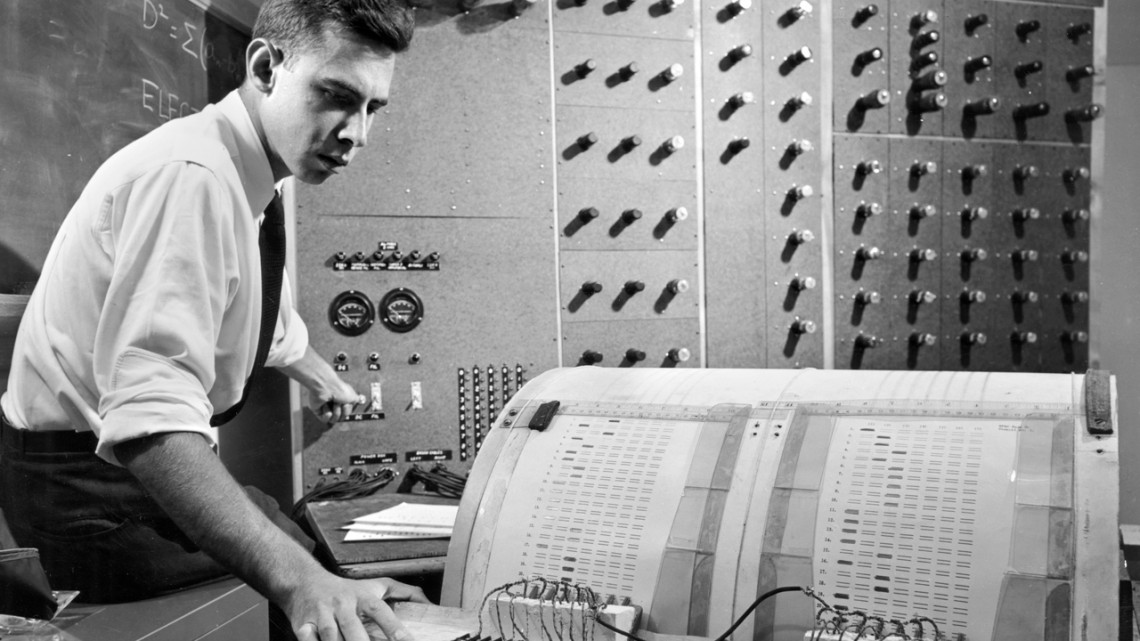

Supongamos que tenemos un conjunto de datos de entrada con dos características, x1 y x2, y queremos clasificarlos en dos clases: C1 y C2.

Vamos a utilizar un perceptrón simple para este propósito.

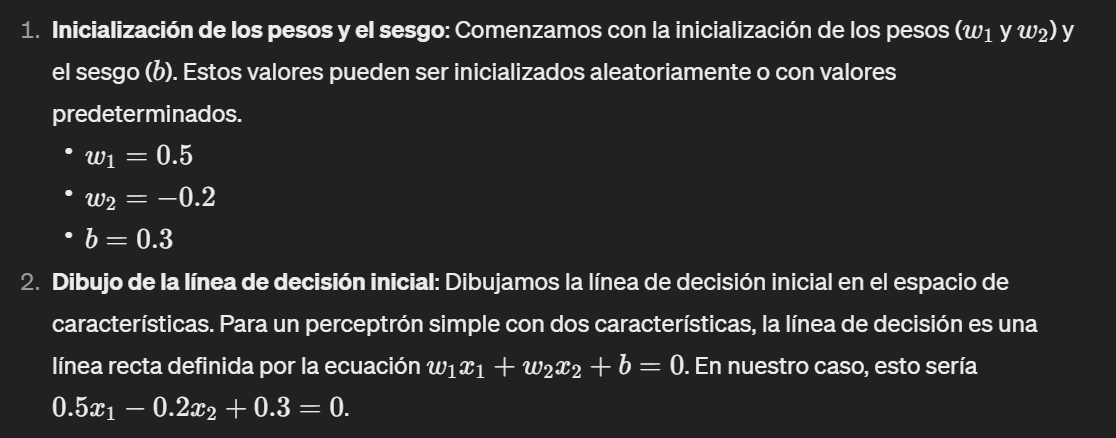

Clasificación de puntos de datos: Tomamos un punto de datos de nuestro conjunto de entrenamiento y lo clasificamos utilizando la línea de decisión actual.

Cálculo de la salida del perceptrón: Para un punto de datos con características x1 y x2, calculamos la salida del perceptrón utilizando la función de activación. En este caso, usaremos una función escalón unitario, que devuelve 1 si la entrada es mayor o igual a cero, y -1 en caso contrario. La salida se calcula como:

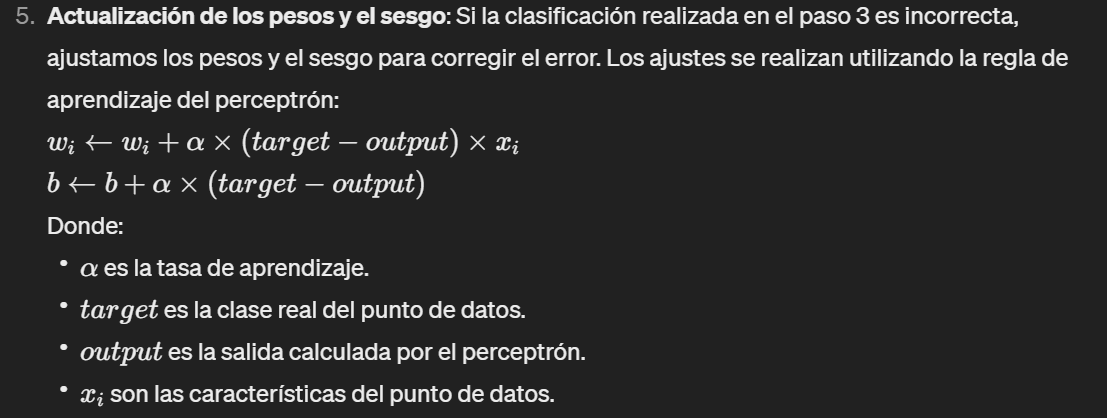


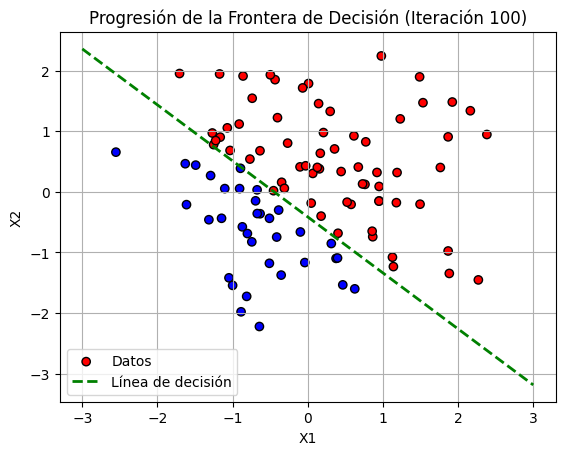

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.history = []

        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                output = self.predict(xi)
                update = self.learning_rate * (target - output)
                self.weights += update * xi
                self.bias += update
            self.history.append((self.weights.copy(), self.bias))

    def predict(self, X):
        return np.where((np.dot(X, self.weights) + self.bias) >= 0, 1, -1)

# Generar datos de ejemplo linealmente separables
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.array([1 if xi[0] + xi[1] + 0.5 >= 0 else -1 for xi in X])

# Crear y entrenar el perceptrón
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X, y)

# Visualizar la progresión de la frontera de decisión
fig, ax = plt.subplots()

for i in range(len(perceptron.history)):
    clear_output(wait=True)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o', edgecolors='k', label='Datos')
    weights, bias = perceptron.history[i]
    x_values = np.linspace(-3, 3, 2)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, color='green', linestyle='--', linewidth=2, label='Línea de decisión')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Progresión de la Frontera de Decisión (Iteración {})'.format(i+1))
    plt.legend()
    plt.grid(True)
    plt.show()
    time.sleep(0.5)



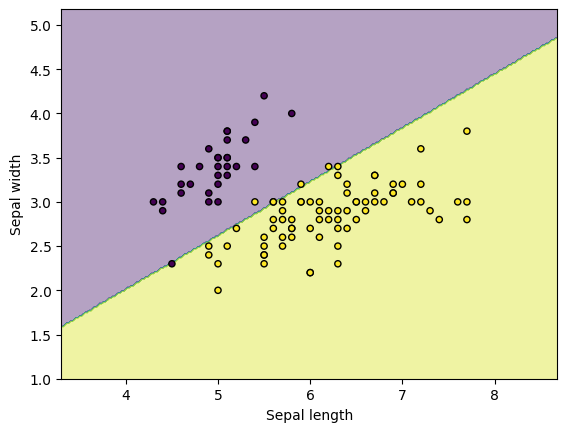

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                y_predicted = self.predict(xi)
                update = self.learning_rate * (target - y_predicted)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        return np.where((np.dot(X, self.weights) + self.bias) >= 0, 1, -1)

def plot_decision_boundary(X, y, classifier):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# Cargando el conjunto de datos Iris
iris = load_iris()
X = iris.data[:, :2]  # Tomando solo las dos primeras características para simplificar
y = (iris.target != 0) * 2 - 1  # Convertir etiquetas a -1 y 1

# Dividiendo el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creando y entrenando el perceptrón
perceptron = Perceptron(learning_rate=0.1, n_iterations=100)
perceptron.fit(X_train, y_train)

# Visualizando la frontera de decisión
plot_decision_boundary(X_train, y_train, perceptron)
